# Data analysis tutorial with Python.

This is a simple introduction to the main libraries and functions available for Python to explore, analyse and make predictions of a dataset.

The data used in this notebook is taken from: https://archive.ics.uci.edu/ml/datasets/Air+quality

Below are the basic libraries to do data science.

In [30]:
# Math and array functions.
import numpy as np

# Dataset managing.
import pandas as pd

# Plots.
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Machine learning, data preprocessing and score functions.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Below is a simple piece of code to fetch the data from a compressed file at some URL.

In [2]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
r = urlopen(path).read()
zf = ZipFile(BytesIO(r))

f = 'AirQualityUCI.csv'

## 1. Data reading and wrangling.

The data is read and stored to the variable *df*, a dataframe. The function *pd.read_csv()* can be given just one argument, the path of the CSV file to analyse. (It can also be given a TSV file.)

The additional arguments given are
- *sep*: to specify the character separing the columns; the default is ','.
- *parse_dates*: to read some columns as dates.

After reading the file and storing it to the variable *df*, the first 5 rows of the dataset are shown (with the method *.head()*).

In [3]:
df = pd.read_csv(zf.open(f), sep=';', parse_dates=['Date'])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,2004-10-03,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,2004-10-03,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,2004-10-03,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,2004-10-03,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


Also, the types of the columns are printed (with the attribute *.dtypes*).

In [4]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object

The first observation to be done is that the last 2 columns appear to be empty (scrolling the first 5 rows to the right). To check it, first print the total number of rows of the dataset with *df.shape*.

In [5]:
df.shape

(9471, 17)

There are 9471 rows in total and 17 columns. Now let's find how many missing values there are. This can be achieved by calling the method *.isna()* to the dataframe, which returns a dataframe with the same shape but with boolean values, and then calling *.sum()* to it to add up the *True* values.

The result is the total count of missing values for each column in the dataframe.

In [6]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

It is evident that the last 2 columns *Unnamed: 15* and *Unnamed: 16* are empty - they have missing values in each row. They can be dropped with the *.drop()* method and an argument, *columns*, specifying their names in a list.

In [7]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

Now, from the *.isna().sum()* performed above it has been seen that there are missing values in other columns too. We can drop rows with missing values with the method *.dropna()*.

Giving the optional argument *subset* with a list of columns will restrict the previous method to drop only the rows with missing values in those specific columns. In this case, the *Date* column is given, as this is a time-series dataset - rows with no date are not wanted.

(In fact, the *Date* column could be set as the index column of the dataset, but this will be done later.)

In [8]:
df = df.dropna(subset=['Date'])

Another observation that can be done by looking at the first 5 rows of the dataframe and checking their *dtypes* is that there are some columns with the *dtype* 'object' that are, in fact, numerical. However, these columns contain commas as decimal separators. Let's start by selecting these columns.

In [9]:
obj_cols = [col for col in df.columns if df[col].dtype=='object']
obj_cols.remove('Time')
obj_cols

['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

In [10]:
df[obj_cols].head()

,CO(GT),C6H6(GT),T,RH,AH
0,"2,6","11,9","13,6","48,9","0,7578"
1,2,"9,4","13,3","47,7","0,7255"
2,"2,2","9,0","11,9","54,0","0,7502"
3,"2,2","9,2","11,0","60,0","0,7867"
4,"1,6","6,5","11,2","59,6","0,7888"


Above it is again seen that the 'object' columns (except *Time*, which has been removed from the list) contain commas as decimal separators. Let's replace these commas for points and use the function *pd.to_numeric()* to convert these columns to numeric *dtype*.

In [11]:
for col in obj_cols:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col])

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

Now all numeric columns have *dtype* 'float64'.

Next, let's make some new columns. From the *Date* column, a column containing the year can be made by taking the attribute *.year* from each date. It has to be casted to integer to avoid the default 'float64' *dtype*.

More columns could be made with the other attributes: *.month*, *.day*... But let's dig deeper: let's make a column containing not the number but the name of the month. This can be achieved by calling the method *.strftime('%B')*. Similarly, a column containing the day of the week can be also done.

In [13]:
df['Year'] = [int(date.year) for date in df['Date']]
df['Month'] = [date.strftime('%B') for date in df['Date']]
df['DayOfWeek'] = [date.strftime('%A') for date in df['Date']]

# To reorder the columns.
cols = df.columns.tolist()
cols = [cols[0]] + cols[15:] + cols[1:15]
df = df[cols]

df.head()

,Date,Year,Month,DayOfWeek,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,2004,October,Sunday,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,2004,October,Sunday,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,2004,October,Sunday,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,2004,October,Sunday,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,2004,October,Sunday,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## 2. Prediction of future CO concentration.

Let's start by checking again the shape of the dataframe.

In [14]:
df.shape

(9357, 18)

Next, add a new column, *Target*, that contains the CO concentration of one hour later. This can be achieved easily with the method *.shift()* and argument *1*, to move just one row downwards. This leaves the first row of this new column empty, so it can be dropped.

In [15]:
df['Target'] = df['CO(GT)'].shift(1)
df = df.dropna()

In [16]:
df.shape

(9356, 19)

There's a new column and one row less, as expected.

Let's choose the most relevant columns, or features, for the prediction of *Target*.

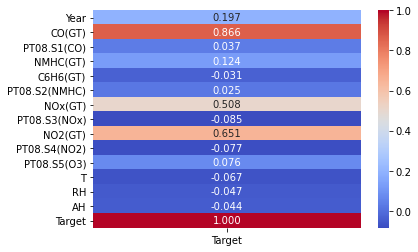

In [17]:
matrix = df.corr(method='pearson')

sns.heatmap(matrix[['Target']], annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

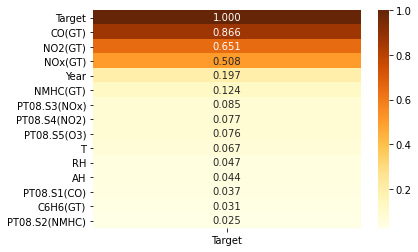

In [18]:
abs_matrix = np.abs(matrix).sort_values(by='Target', ascending=False)

sns.heatmap(abs_matrix[['Target']], annot=True, fmt='.3f', cmap='YlOrBr')
plt.show()

In [19]:
columns = abs_matrix.head(6).index.tolist()
columns

['Target', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'Year', 'NMHC(GT)']

The selected columns have all an absolute Pearson coefficient above *0.1*.

Now, the features dataframe is defined as *X* and the target is stored at *y*.

In [20]:
X = df[columns]
y = X.Target
X = X.drop(columns=['Target'])
X.head()

,CO(GT),NO2(GT),NOx(GT),Year,NMHC(GT)
1,2.0,92.0,103.0,2004,112.0
2,2.2,114.0,131.0,2004,88.0
3,2.2,122.0,172.0,2004,80.0
4,1.6,116.0,131.0,2004,51.0
5,1.2,96.0,89.0,2004,38.0


Next, the rows are split in two sets: the train and the test sets. The train sets will be used to fit the model and the test sets will be used to validate if the fitted model is accurate or not. The ratio between train and test in this case is set to be at *60 : 40*.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

The model is defined and fitted with the train sets.

In [22]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

And a prediction is done with the fitted model with the test features.

In [23]:
pred = reg.predict(X_test)

Now a function is defined to print some scores to validate the model.

In [24]:
def print_scores(pred, y_test):
    print('MAE = {:.2f}'.format(mean_absolute_error(pred, y_test)))
    print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(pred, y_test))))
    print('R2 = {:.2f}'.format(r2_score(pred, y_test)))

And the scores for this prediction are printed.

In [25]:
print_scores(pred, y_test)

MAE = 14.81
RMSE = 36.76
R2 = 0.70


Let's compare the model used, a simple linear regression, to a benchmark model, a model that assumes that the concentration of CO does not change from one hour to another.

In [26]:
pred = X_test['CO(GT)']
print_scores(pred, y_test)

MAE = 7.91
RMSE = 38.75
R2 = 0.75


It looks like a simple linear regression performs slightly worse than a trivial benchmark model like this. A more complex and accurate model has to be used to achieve a better result.

In [29]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print_scores(pred, y_test)

MAE = 12.40
RMSE = 47.13
R2 = 0.63


In [31]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print_scores(pred, y_test)

MAE = 11.67
RMSE = 35.30
R2 = 0.75


Apparently, a decision tree performs even worse than a linear regression.

On the other hand, a random forest gives a better root mean squared error than the benchmark model, meaning that the errors are smaller using a random forest. However, the mean absolute value for the random forest is slightly higher than for the benchmark model. This means that using the benchmark model there are higher gaps between the predicion and the test values, which are more penalized by root mean squared error.